 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

1:00:00


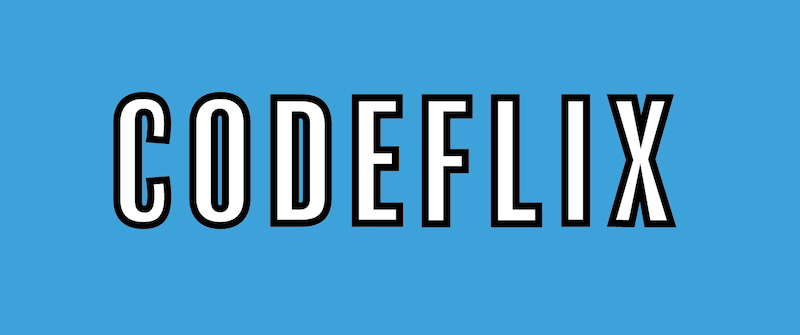

In [1]:
from datetime import timedelta, date #timedelta duration expressing the difference between two date, time, or datetime instances to microsecond resolution
from IPython.display import Image
import requests #calls to an API
from time import sleep

generic_image = 'codeflix.png'

print(timedelta(minutes = 60))

display(Image(generic_image))

# users add info but its only accessible to themselves, like credit card info


In [2]:
class Video:
    def __init__(self):
        self.title = ""
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now Playing {self.title}")
        display(Image(self.link))
    
    def pause(self):
        print("Video Paused")
    
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."

Cool Video is 0 seconds long.
Now Playing Cool Video


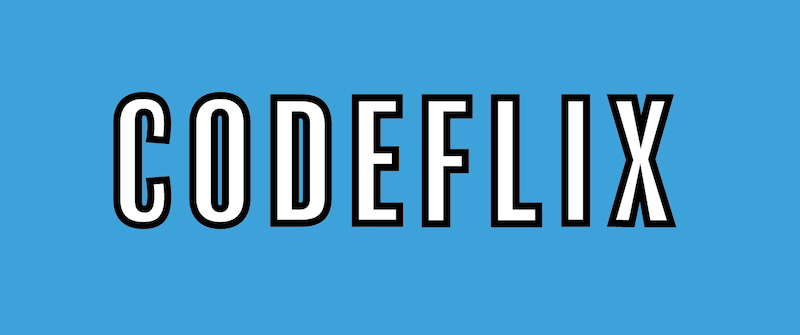

In [3]:
vid = Video()

vid.title = "Cool Video"

print(vid)
vid.play()

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [4]:
class Movie(Video):
    pass

class Commercial(Video):
    pass

#all these classes can be children because they use the base of play pause etc

# mixins are classes not related to the parent or considered children, but contain methods that can be implemented iinto any class
# - almost like add-ons (Evolver and Teach_Move from the Pokemon api arent related, but contain methods Pokemon can use)



In [5]:
# users know how to use a computer but dont know entirely how it works
# users only being exposed to what you can use or need to understand

# we gave users to teach moves for their pokemon but doesn't allow them to make changes to the actual code
        #child(Parent) - parent is always generic, child is more specific
class Episode(Video):
    def __init__(self, data): #added data as a positional argument to satisfy the for loop in Series
        Video.__init__(self) #because you inherited play methods in "Video", you can't see that but it's there
        self.number = data['number']
        self.season = data["season"]
        self.date_aired = data["airdate"]
        self.summary = data["summary"]
        self.rating = data["rating"]["average"]
        self.length = timedelta(minutes = data["runtime"])
        self.title = data["name"]
        if data["image"]:
            self.link = data["image"]["medium"]


## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [6]:
# api call

class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.genres = []
        self.episodes = [] #placing instances of the class Episode. Each index is now an instance of Episode
    
    def get_Info(self, query = ""): #optional argument of query
        data = None
        while not data:
            if not query:
                query = input("What is the name of the series? ")
            r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
            if r.status_code == 200:
                data = r.json() #breaks the loop since data is Truthy
            else:
                print(f"Series error: status code {r.status_code}")
                query = "" #if condition triggers again
                
        #use data to fill attributes
        self.id = data["id"]
        self.title = data["name"]
        self.genre = data["genres"]
        self.summary = data["summary"]
        if data["network"]:
            self.network = data["network"]["name"]
        else:
            self.network = data["webChannel"]["name"]
        
        #API call for episodes
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes") #you can rewrite r because we don't need the first api anymore, all data is already taken and added to self
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode error: status code {r2.status_code}")
            return
        
        self.seasons = episodes[-1]["season"]
        self.episodes = [Episode(ep) for ep in episodes] #for every item in the list of episodes in the api, pass it into Episodes() to create an instance for each one
        #because you are initializing an instance, and taking in an argument, you need to add a required posiitonal argument to the class Episodes, and the information will fill in the empty variables
        print(f"{self.title} has {len(self.episodes)} episodes.")
    
    def play(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? y/N ")
                if watching.lower().strip() not in ("yes","y"):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
    
    def __len__(self):
        return len(self.episodes) #we reproduce what "len() of an instance of Series" will output
    
    def __repr__(self):
        return f"Title: {self.title}" #we reproduce what "print() of an instance of Series" will output
        

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [7]:
class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    # add_user
    def add_user(self, name = ""):
        if not name:
            name = input("What is the name of your new user? ")
        self.users.append(name)
        self.choose_user()
    #use User class here^^
        
    # choose_user
    def choose_user(self):
        while True:
            print("Users")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a user." )
                
    # add_to_watch_list
    def add_to_watch_list(self, query = ""):
        show = Series()
        show.get_Info(query)
        self.watch_list.append(show)
        print(f"{show.title} has been added to the watchlist.")
        
    # choose_from_watch_list
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n{series.summary}")
            display(Image(series.episodes[0].link))
            
        watch = input("What do you want to watch? ").lower()
        
        if watch in list(map(lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.play()
        else:
            response = input(f"{watch} is not in your watch list. Would you like to add it? y/N ")
            if response in ("yes","y"):
                self.add_to_watch_list(watch)
                self.watch_list[-1].play()
                
    
    # run
    def run(self):
        """
            Method allowing users to choose a series and play episodes.
        """
        
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
        print(self.current_user)
        print("""
            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from your watch list
            Add    - Add a new user
            Quit   - Close the app
        """)
        
        while True:
            response = input("What would you like to do (search, watch, add, quit) ").lower()
            
            if response == "search":
                self.add_to_watch_list()
            elif response == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "quit":
                print(f"Thanks for watching {self.current_user}.")
                break
            else:
                print('Incorrect input... Try again.')

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [8]:
#Create User class

class User_Account:
    
    def __init__(self):
        self.name = None
        self.email = None
        self.user_name = None
        self.password = None
        self.theater = None
    
    def sign_in(self):
        if self.user_name and self.password:
            username = input("Enter your username: ").lower().strip()
            passcode = input("Enter your password: ")
            while username != self.user_name or passcode != self.password:
                print("Username or Password is incorrect. Try again. [Type 'quit' to cancel]")
                username = input("Enter your username: ").lower().strip()
                if username == 'quit':
                    return
                passcode = input("Enter your password: ").strip()
                if passcode == 'quit':
                    return
            if username == self.user_name and passcode == self.password:
                self.theater.run() #confirming the user instance has a username and password (an account basically) will run the instance of Theater created at sign up
        else:
            print("It looks like you don't have an account with us 😢")
            print("How do we know? Don't ask...\n")
            sign_up_choice = input("Would you like to sign up? (y/N)").lower().strip()
            if sign_up_choice in ("y","yes"):
                self.sign_up() #if there is no username or password associated with this user, call sign up method
            else:
                return
    
    def sign_up(self):
        print(f"""
                                Welcome to CodeFlix!
        
        Sign up to browse and watch unlimited series at the palm of your hands.
            
        """)
        existing_user = input("Already have an account? Sign In (y/N)").lower().strip()
        if existing_user in ("y", "yes"):
            self.sign_in()
        else:
            sign_up_choice = input("Would you like to sign up and enjoy our flawless streaming service? (y/N) ").lower().strip()
            if sign_up_choice in ("y","yes"):
                new_username = input("Enter a username: ").lower().strip()
                self.user_name = new_username
                new_pass = input("Enter your password: ").strip()
                self.password = new_pass
                email = input("Enter your email address: ").lower().strip()
                while "@" not in email and ".com" not in email:
                    email = input("Please enter a valid email address ('quit' to cancel)").lower().strip()
                    if email == "quit":
                        self.email = None
                        self.user_name = None
                        self.password = None
                        return
                self.email = email
                name_input = input("What is your name? ").strip()
                self.name = name_input
                print(f"Welcome, {self.name}!")
                new_theater = Theater() #creates the users own Theater instance
                self.theater = new_theater #saves that instance to the user
            else:
                return
    
        
        

    

        

In [9]:
me = User_Account()

In [10]:
me.sign_in()

It looks like you don't have an account with us 😢
How do we know? Don't ask...

Would you like to sign up? (y/N)y

                                Welcome to CodeFlix!
        
        Sign up to browse and watch unlimited series at the palm of your hands.
            
        
Already have an account? Sign In (y/N)y
It looks like you don't have an account with us 😢
How do we know? Don't ask...

Would you like to sign up? (y/N)y

                                Welcome to CodeFlix!
        
        Sign up to browse and watch unlimited series at the palm of your hands.
            
        
Already have an account? Sign In (y/N)n
Would you like to sign up and enjoy our flawless streaming service? (y/N) y
Enter a username: jordyc2163
Enter your password: password
Enter your email address: kbkjhb
Please enter a valid email address ('quit' to cancel)jkkjbjkbk
Please enter a valid email address ('quit' to cancel)email@email.com
What is your name? Jordy
Welcome, Jordy!


Enter your username: joij
Enter your password: jiknkj
Username or Password is incorrect. Try again. [Type 'quit' to cancel]
Enter your username: jordcy2163
Enter your password: password
Username or Password is incorrect. Try again. [Type 'quit' to cancel]
Enter your username: jordyc2163
Enter your password: password


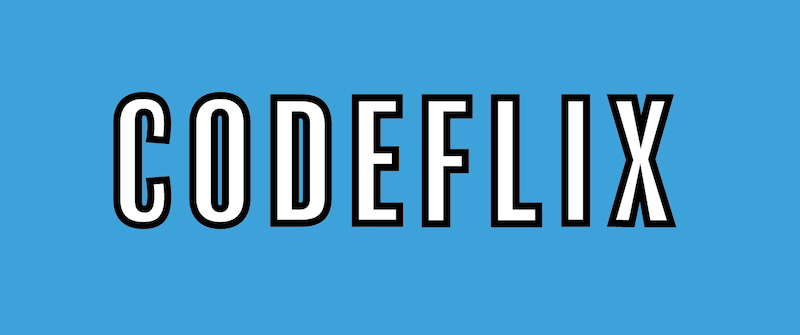

Create a profile: Jordy
Users
Jordy
Choose a user: Jordy
Jordy

            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from your watch list
            Add    - Add a new user
            Quit   - Close the app
        
What would you like to do (search, watch, add, quit) add
What is the name of your new user? Ashlea
Users
Jordy
Ashlea
Choose a user: Ashlea
What would you like to do (search, watch, add, quit) search
What is the name of the series? friends
Friends has 236 episodes.
Friends has been added to the watchlist.
What would you like to do (search, watch, add, quit) watch


Title: Friends | Episodes: 236

Summary: 
<p>Six young (20-something) people from New York City (Manhattan), on their own and struggling to survive in the real world, find the companionship, comfort and support they get from each other to be the perfect antidote to the pressures of life.</p><p>This average group of buddies goes through mas

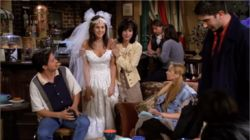

What do you want to watch? friends
Now Playing The One Where Monica Gets a Roommate


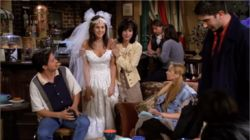

Now Playing The One With the Sonogram at the End


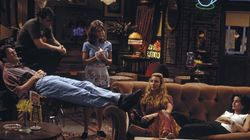

Now Playing The One With the Thumb


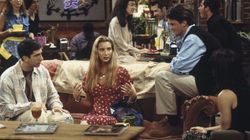

Are you still watching? y/N y
Now Playing The One With George Stephanopoulos


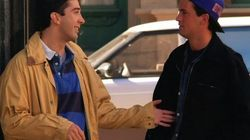

Now Playing The One With the East German Laundry Detergent


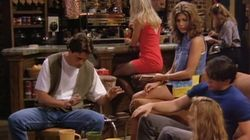

Now Playing The One With the Butt


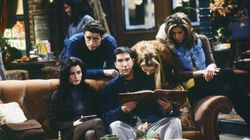

Are you still watching? y/N n
What would you like to do (search, watch, add, quit) watch


Title: Friends | Episodes: 236

Summary: 
<p>Six young (20-something) people from New York City (Manhattan), on their own and struggling to survive in the real world, find the companionship, comfort and support they get from each other to be the perfect antidote to the pressures of life.</p><p>This average group of buddies goes through massive mayhem, family trouble, past and future romances, fights, laughs, tears and surprises as they learn what it really means to be a friend.</p>


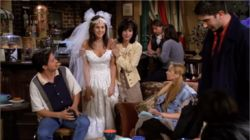

What do you want to watch? family guy
family guy is not in your watch list. Would you like to add it? y/N y
Family Guy has 390 episodes.
Family Guy has been added to the watchlist.
Now Playing Death Has a Shadow


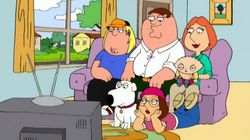

Now Playing I Never Met the Dead Man


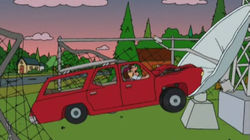

Now Playing Chitty Chitty Death Bang


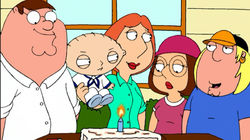

Are you still watching? y/N n
What would you like to do (search, watch, add, quit) quit
Thanks for watching Ashlea.


In [11]:
me.sign_in()

Enter your username: jordyc2163
Enter your password: password


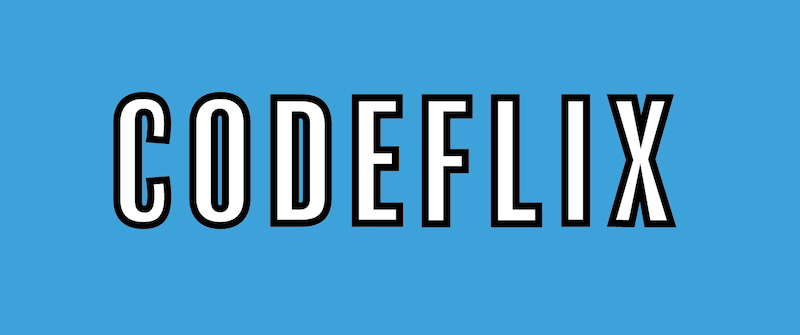

Users
Jordy
Ashlea


In [ ]:
me.sign_in()